In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\school\Modèles de regression\projet\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

let's explore the variables we have

In [16]:
df['region'].nunique()

4

In [18]:
df['children'].nunique()

6

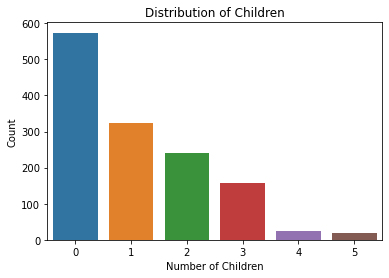

In [19]:
sns.countplot(x='children', data=df)
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

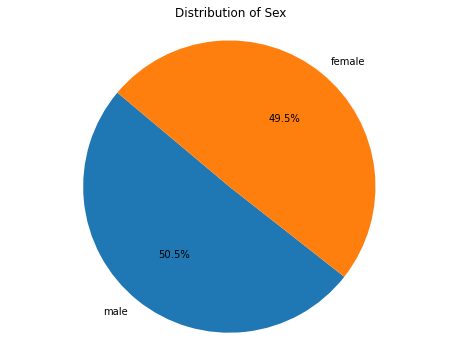

In [8]:
plt.figure(figsize=(8, 6))
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.axis('equal') 
plt.show()

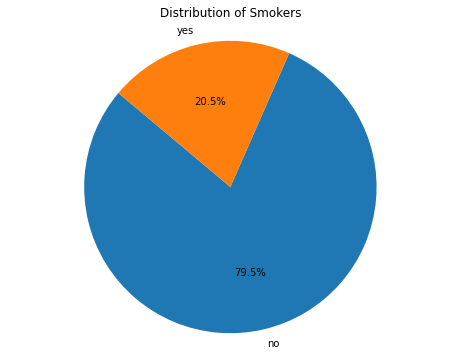

In [9]:
plt.figure(figsize=(8, 6))
plt.pie(df['smoker'].value_counts(), labels=df['smoker'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Smokers')
plt.axis('equal') 
plt.show()

In [13]:
correlation_matrix = df[['age', 'bmi']].corr()
print(correlation_matrix)

          age       bmi
age  1.000000  0.109272
bmi  0.109272  1.000000


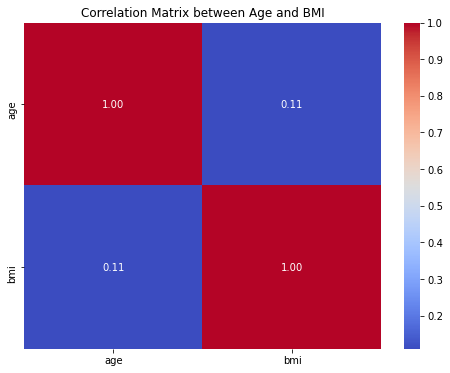

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Age and BMI')
plt.show()

pas de corrélation entre bmi et l'age

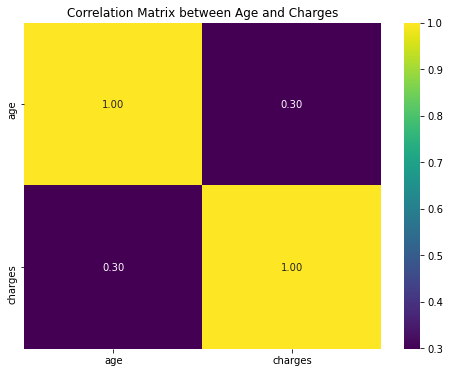

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age','charges']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix between Age and Charges')
plt.show()

pas de corrélation entre les charges et l'age

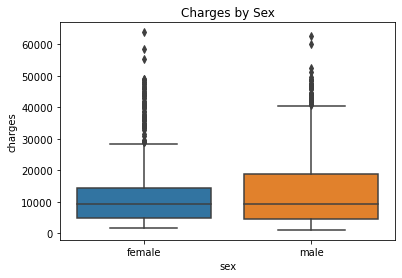

In [15]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

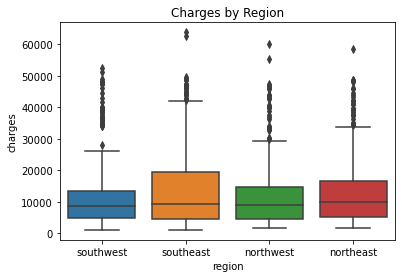

In [21]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()

Hnadling the outliers

In [32]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)


11899.625365
-13109.1508975
34489.350562499996
